Regresión Logística --- 11:07 min
===

* 11:07 min | Ultima modificación: Octubre 17, 2021 | [YouTube](https://youtu.be/ztwo9aHdIV0)

## Interpretación del modelo

Para un problema binario dicotomico con clases $C_1$ y $C_2$, la probabilidad de pertenencia de un punto $\mathbf{x}$ a la clase $C_1$ depende de los parámetros del modelo $\mathbf{w}$, tal que:

$$
p(C_1|\mathbf{w}) = \sigma \left( w_0 + \sum_i w_i x_i   \right)
$$

y la pertenecia a la clase $C_2$ es igual a $1 - p(C_1 | \mathbf{w})$. En la ecuación anterior, $\sigma(u)$ es la función logística:

$$
y_i = \sigma(u) = \frac{1}{1+\exp(-u)}
$$

![assets/logreg-2.jpg](assets/logreg-2.jpg)

En la regresión logística, los parámetros del modelo se estiman a través de la minimización de la función de entropía cruzada, definida como:

$$ 
L = - \sum_i^P d_i \cdot \log(y_i) + 
(1-d_i) \cdot \log(1 - y_i)
$$ 

En esta función de error se debe analizar el caso para cada patrón:

* Si $d_i = 1$, entonces se desea minimizar $-\log(y_i)$ por lo que $y_i$ debe ser lo más cercana posible a 1.0 (recuerde que la función logística genera valores entre 0 y 1, y que el término $(1 - d_i) = 0$). 

* Si $d_i = 0$, entonces se desea minimizar $-\log(1 - y_i)$ por lo que $y_i$ debe ser lo más cercana posible a 0.0. 

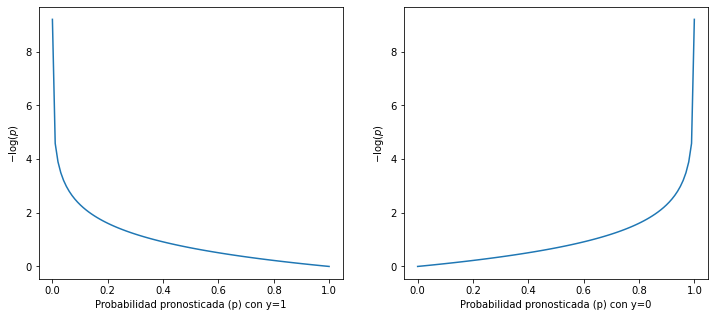

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def plot_entropy():

    x = np.linspace(0.0001, 0.9999, 100)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, -np.log(x))
    plt.xlabel("Probabilidad pronosticada (p) con y=1")
    plt.ylabel("$-\log(p)$")

    plt.subplot(1, 2, 2)
    plt.plot(x, -np.log(1 - x))
    plt.xlabel("Probabilidad pronosticada (p) con y=0")
    plt.ylabel("$-\log(p)$")

    plt.show()


plot_entropy()

Para más de dos clases se generaliza a:

$$
- \sum d_c \cdot \log (p_c)
$$

donde $d_c$ indica que el punto pertenece a la clase $c$ y $p_c$ es su probabilidad de pertenencia (resultado del clasificador).

## Derivada de la función sigmoidea

Para el cómputo de la función de costo (función de entropía cruzada) se requeiere, primero, computar la derivada de la función sigmoidea definida como:

$$
\sigma (u) = \frac{1}{1+\exp(-u)}
$$

La derivada se computa como:

$$
\begin{split}
    \frac{d}{du} \sigma(u) 
    & = \frac{d}{du} [1 + \exp(-u)] ^ {-1}
    \\ \\
    & = - [1 + \exp(-u)]^{-2} \cdot \frac{d}{du} [1 + \exp(-u)] 
    \\ \\
    & = - [1 + \exp(-u)]^{-2} \cdot \frac{d}{du} [\exp(-u)] 
    \\ \\
    & = - [1 + \exp(-u)]^{-2} \cdot \exp(-u) \cdot \frac{d}{du} (-u)
    \\ \\ 
    & = - [1 + \exp(-u)]^{-2} \cdot \exp(-u) \cdot -1 
    \\ \\
    & = [1 + \exp(-u)]^{-2} \cdot \exp(-u) 
    \\ \\
    & = \frac{\exp(-u) }{[1 + \exp(-u)]^2}
    \\ \\
    & = \frac{[1 + \exp(-u)] - 1}{[1 + \exp(-u)]^2}
    \\ \\
    & = \frac{1}{1 + \exp(-u)}
        \left[
            \frac{[1 + \exp(-u)] - 1}{1 + \exp(-u)}
        \right]
    \\ \\
    & = \sigma(u) \cdot 
        \left[
            \frac{1 + \exp(-u)}{1 + \exp(-u)} 
            - \frac{1}{1 + \exp(-u)} 
        \right]
    \\ \\
    & = \sigma(u) \cdot [1 - \sigma(u)]
\end{split}
$$

## Derivada de la función de costo

Se computa como:

$$
\begin{split}
\frac{\partial }{\partial w_j} L 
    & = \frac{\partial }{\partial w_j} 
    \left[ 
        - \sum_i^P d_i \cdot \log(y_i) + (1-d_i) \cdot \log(1 - y_i) 
    \right] 
    \\ \\
    & = - \sum_i^P \frac{\partial }{\partial w_j} 
    \left[     
        d_i \cdot \log(y_i) + (1-d_i) \cdot \log(1 - y_i) 
    \right] 
    \\ \\
    & = - \sum_i^P d_i \cdot \frac{\partial }{\partial w_j} \log(y_i)
       + (1-d_i) \cdot \frac{\partial }{\partial w_j} \log(1 - y_i)
    \\ \\
    & = - \sum_i^P d_i \cdot \frac{1}{y_i}   \frac{\partial }{\partial w_j} y_i
       + (1-d_i) \cdot \frac{1}{1-y_i} \frac{\partial }{\partial w_j} (1 - y_i)
    \\ \\
    & = - \sum_i^P d_i \cdot \frac{1}{y_i} \cdot \left[ y_i \cdot (1 - y_i) \right] 
       \frac{\partial }{\partial w_j} u
       - (1-d_i) \cdot \frac{1}{1-y_i} \cdot \left[ y_i \cdot (1 - y_i) \right]
       \cdot \frac{\partial }{\partial w_j} u
    \\ \\
    & = - \sum_i^P d_i \cdot  (1 - y_i)
       \frac{\partial }{\partial w_j} u
       - (1-d_i) \cdot y_i 
       \cdot \frac{\partial }{\partial w_j} u
\end{split}
$$

A partir de la ecuación anterior es posible computar el gradiente para los parámetros del modelo

$$
\frac{\partial}{\partial w_0} L = - \sum_i^P d_i \cdot  (1 - y_i)
       - (1-d_i) \cdot y_i 
$$

$$
\frac{\partial}{\partial w_j} L = - \sum_i^P x_j \cdot [d_i \cdot  (1 - y_i)
       - (1-d_i) \cdot y_i] 
$$

## Implementacion en scikit-learn

scikit-learn implementa diferentes funciones de costo, donde $y_i \in \{-1, +1 \}$:

* Penalización $l_2$:

$$
\frac{1}{2} \sum_p w^2_p  + C \sum_i^n \log 
\left[
    \exp \left(
        -y_i (w_0 + \sum_p w_p x_p)
    \right)
\right]
$$

* Penalización $l_1$:

$$
\frac{1}{2} \sum_p |w_p|  + C \sum_i^n \log 
\left[
    \exp \left(
        -y_i (w_0 + \sum_p w_p x_p)
    \right)
\right]
$$

* Elastic-Net:

$$
\frac{1-\rho}{2} \sum_p w^2_p  
+ \rho \sum_p |w_p|
+ C \sum_i^n \log 
\left[
    \exp \left(
        -y_i (w_0 + \sum_p w_p x_p)
    \right)
\right]
$$

## Ejemplo numérico

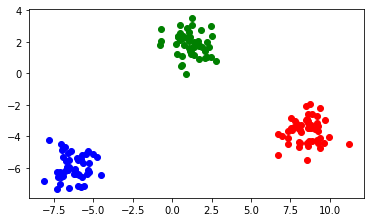

In [2]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

logisticRegression = LogisticRegression(
    #
    # ‘l1’, ‘l2’, ‘elasticnet’, ‘none’
    penalty="none",
    tol=0.0001,
    #
    # factor inverso para regularizacion (SVM)
    C=1.0,
    fit_intercept=True,
    random_state=None,
    #
    # 'newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
    solver="lbfgs",
    max_iter=100,
    #
    # ‘ovr’, ‘multinomial’, ‘auto’
    multi_class="auto",
    verbose=0,
    #
    # ?re-usa la solución previa
    warm_start=False,
    #
    # Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1
    l1_ratio=None,
)

logisticRegression.fit(X, d)

logisticRegression.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
logisticRegression.predict([[2.5, -4.0]])

array([0])

In [5]:
logisticRegression.intercept_

array([-5.32731038, -2.58361454,  7.91092493])

In [6]:
logisticRegression.coef_

array([[ 1.47085335, -1.78916427],
       [-1.03371155, -1.63099238],
       [-0.4371418 ,  3.42015665]])

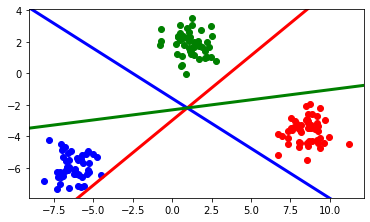

In [7]:
import numpy as np

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)

fronteraA = (
    -logisticRegression.intercept_[0] / logisticRegression.coef_[0][1]
    - logisticRegression.coef_[0][0] / logisticRegression.coef_[0][1] * xplot
)

fronteraB = (
    -logisticRegression.intercept_[1] / logisticRegression.coef_[1][1]
    - logisticRegression.coef_[1][0] / logisticRegression.coef_[1][1] * xplot
)

fronteraC = (
    -logisticRegression.intercept_[2] / logisticRegression.coef_[2][1]
    - logisticRegression.coef_[2][0] / logisticRegression.coef_[2][1] * xplot
)

plt.plot(xplot, fronteraA, color="red", linewidth=3)
plt.plot(xplot, fronteraB, color="blue", linewidth=3)
plt.plot(xplot, fronteraC, color="green", linewidth=3)

plt.xlim(xlim)
plt.ylim(ylim);

In [8]:
logisticRegression.predict_proba(X)[0:10]

array([[9.99999996e-01, 3.37213413e-09, 5.87763928e-10],
       [9.99999987e-01, 9.83061700e-10, 1.16679900e-08],
       [1.00000000e+00, 4.42184492e-10, 2.02839427e-13],
       [9.99999997e-01, 2.32571602e-09, 3.57170430e-10],
       [9.99999999e-01, 2.91545720e-10, 1.06746679e-09],
       [9.99999793e-01, 2.06351621e-07, 9.43530066e-10],
       [1.00000000e+00, 1.30864625e-10, 2.63441344e-12],
       [9.99999984e-01, 1.22786241e-08, 3.48299674e-09],
       [1.00000000e+00, 5.12857770e-12, 2.08349752e-14],
       [9.99999986e-01, 1.26548112e-08, 8.47345532e-10]])